# Pheno_Woody_Breaking




In [29]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from scipy import stats

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Open file and load data

In [31]:
# load csv file
original_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/herb flower data/pheno_woody/Pheno_Woody_Brking_Lvs_GT6Yrs.csv')

In [32]:
# create a copy of data
df = original_data.copy()

In [33]:
# view the first few entries of the data
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY
0,Acer,rubrum,2,Home,ME,2011,117
1,Acer,rubrum,2,Home,ME,2012,83
2,Acer,rubrum,2,Home,ME,2013,114
3,Acer,rubrum,2,Home,ME,2014,125
4,Acer,rubrum,2,Home,ME,2015,124


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Genus      4927 non-null   object
 1   Species    4927 non-null   object
 2   Site_ID    4927 non-null   int64 
 3   Site_Name  4927 non-null   object
 4   State      4927 non-null   object
 5   Year       4927 non-null   int64 
 6   DOY        4927 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 269.6+ KB


## List of unique Genera

In [35]:
genus_list = df['Genus'].unique()

print(len(genus_list), 'unique genera:')
print(genus_list)

62 unique genera:
['Acer' 'Amelanchier' 'Betula' 'Forsythia' 'Fraxinus' 'Hamamelis' 'Ilex'
 'Kalmia' 'Magnolia' 'Prunus' 'Quercus' 'Rhamnus' 'Tilia' 'Juglans'
 'Cercis' 'Cornus' 'Fagus' 'Malus' 'Corylus' 'Carya' 'Lindera'
 'Liquidambar' 'Liriodendron' 'Nyssa' 'Sassafras' 'Ulmus' 'Viburnum'
 'Populus' 'Rhus' 'Sambucus' 'Euonymus' 'Chamaedaphne' 'Rhododendron'
 'Toxicodendron' 'Aesculus' 'Ostrya' 'Cephalanthus' 'Vaccinium' 'Alnus'
 'Arctostaphylos' 'Symphoricarpos' 'Rosa' 'Celtis' 'Parthenocissus'
 'Aruncus' 'Spiraea' 'Gleditsia' 'Robinia' 'Berberis' 'Lonicera' 'Halesia'
 'Poncirus' 'Platanus' 'Diospyros' 'Ginkgo' 'Carpinus' 'Oxydendrum'
 'Gaylussacia' 'Morella' 'Salix' 'Pyrus' 'Asimina']


## List of unique Species

In [36]:
specie_list = df['Species'].unique()

print(len(specie_list), 'unique species:')
print(specie_list)

103 unique species:
['rubrum' 'saccharum' 'arborea' 'papyrifera' 'spp.' 'americana'
 'virginiana' 'verticillata' 'latifolia' 'stellata' 'serotina' 'rubra'
 'velutina' 'cathartica' 'platanoides' 'canadensis' 'nigra'
 'florida-appalachianspring' 'grandifolia' 'florida' 'pumila' 'macrocarpa'
 'lenta' 'glabra' 'benzoin' 'styraciflua' 'tulipifera' 'sylvatica'
 'albidum' 'acerifolium' 'dentatum' 'prunifolium' 'saccharinum'
 'alnifolia' 'balsamifera' 'grandidentata' 'tremuloides' 'typhina'
 'racemosa' 'alba' 'alatus' 'calyculata' 'groenlandicum' 'radicans'
 'negundo' 'sericea' 'occidentalis' 'corymbosum' 'incana' 'alleghaniensis'
 'uva-ursi' 'albus' 'lantanoides' 'multiflora' 'rugosa' 'quinquefolia'
 'dioicus' 'vanhouttei' 'triacanthos' 'deltoides' 'palustris'
 'cordiformis' 'pseudoacacia' 'uliginosum' 'thunbergii' 'maackii'
 'alternifolia' 'morrowii' 'circinatum' 'pavia' 'kousa' 'carolina'
 'grandiflora' 'trifoliata' 'laurocerasus' 'pensylvanicum' 'spicatum'
 'grandiflora-autumnbrilliance' '

## List of unique site names

In [37]:
site_list = df['Site_Name'].unique()

print(len(site_list), 'unique site names:')
print(site_list)

182 unique site names:
['Home' 'Cedar Bog Lake Lowland 2' 'PPN_200228' 'PPN_9200010'
 'PPN_9239908' 'PPN_9339927' 'My front yard' 'my back yard'
 'my NE side yard' 'backyard' 'my front yard' 'home' 'my community garden'
 'front flower bed' 'Spicebush Trail' 'back yard' 'Cary Institute PSB'
 'Bridge Trail' 'Ridge Trail' 'My NW side yard'
 'Beckman Lake Bog (Cedar Creek LTER)'
 'Beckman Lake Highland (Cedar Creek LTER)'
 'PhenoCAM tower (Cedar Creek LTER)' 'MEF S4' 'South of garden terraces'
 'NADP' 'yard' 'Deciduous trees' 'My holler' 'Mirror Lake - NBG'
 'VA Natives Garden - NBG' 'Enchanted Forest - NBG' 'First Meadow'
 'Big Meadow North' 'Montgomery/WeiblenHome' 'Cedar Bog Lake Highland 2'
 'Schoodic Institute' 'My yard' 'Flagstaff Lake'
 'Cedar Bog Lake Highland 1' 'Cedar Bog Lake Lowland 1'
 'Rachel Carson National Wildlife Refuge:  Headquarters'
 'Saratoga Battlefield' 'Michigan house' 'Burlingham west' 'front yard'
 ' Victory Woods' 'my yard' 'SERC - Cattail Pond' 'home backyard'


# Form groupings based on unique categorizations of location, specie, genus

In [38]:
# create a new column to capture the categories the entry pertains to
categories = []
for ind in df.index:
  category = (df['Site_Name'][ind], df['Species'][ind], df['Genus'][ind])
  categories.append(category)
df['categories'] = categories

In [39]:
# view the new column
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,rubrum,2,Home,ME,2011,117,"(Home, rubrum, Acer)"
1,Acer,rubrum,2,Home,ME,2012,83,"(Home, rubrum, Acer)"
2,Acer,rubrum,2,Home,ME,2013,114,"(Home, rubrum, Acer)"
3,Acer,rubrum,2,Home,ME,2014,125,"(Home, rubrum, Acer)"
4,Acer,rubrum,2,Home,ME,2015,124,"(Home, rubrum, Acer)"


In [40]:
category_list = df.categories.unique()
print('There are',len(category_list),'unique groupings of genus, specie, and site')

There are 582 unique groupings of genus, specie, and site


## Map each grouping to the subset of data that it consists of

In [41]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# # for each category group observed in df, map the associated data to the category group
for category in category_list:

  criteria1 = df['Site_Name'] == category[0]
  criteria2 = df['Species'] == category[1]
  criteria3 = df['Genus'] == category[2]

  categorized_data.update({category:df[criteria1 & criteria2 & criteria3]})



## Visualize an Example

In [42]:
# view data associated with a given category group
example_data = categorized_data.get(('Home', 'saccharum', 'Acer'))

# you can look up different category groups by editing the above line of code, inside of the .get() function provide your categories as follows:
# ('Site','specie', 'genera')


In [43]:
# view example dataset
example_data

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
6,Acer,saccharum,2,Home,ME,2011,112,"(Home, saccharum, Acer)"
7,Acer,saccharum,2,Home,ME,2012,104,"(Home, saccharum, Acer)"
8,Acer,saccharum,2,Home,ME,2013,120,"(Home, saccharum, Acer)"
9,Acer,saccharum,2,Home,ME,2014,122,"(Home, saccharum, Acer)"
10,Acer,saccharum,2,Home,ME,2015,124,"(Home, saccharum, Acer)"
11,Acer,saccharum,2,Home,ME,2016,121,"(Home, saccharum, Acer)"
12,Acer,saccharum,2,Home,ME,2017,110,"(Home, saccharum, Acer)"
13,Acer,saccharum,2,Home,ME,2018,123,"(Home, saccharum, Acer)"
14,Acer,saccharum,2,Home,ME,2019,115,"(Home, saccharum, Acer)"
15,Acer,saccharum,2,Home,ME,2020,117,"(Home, saccharum, Acer)"


<Axes: xlabel='Year', ylabel='DOY'>

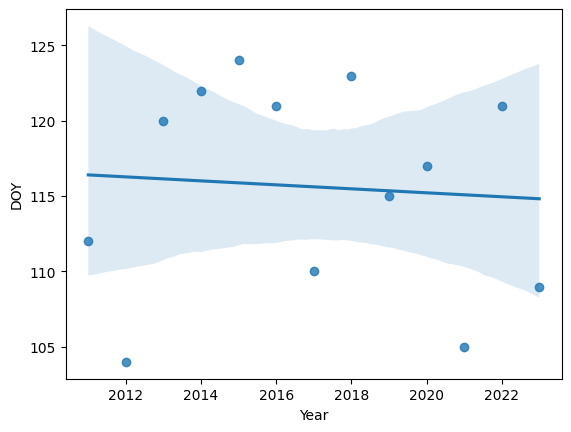

In [44]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['DOY'])

## Calculte Pearson correlation coefficient

In [45]:
x=example_data['Year']
y=example_data['DOY']

round(x.corr(y),4)

-0.0738

## Perform regression and calculate relevant stats for all 582 unique groupings


In [46]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
observations = []
results2 = []

# loop through all unique catgory groupings
for category in category_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(est2.params) >= 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))
  observations.append(len(example_data['Year']))


correlation_df = pd.DataFrame({
    'grouping':category_groups,
    'observations':observations,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


In [47]:
# drop all rows containing NaN values (these seem to usually result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view catergories & correlation
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

                                                                                    grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
0                                                                       (Home, rubrum, Acer)            13     0.6860     0.5897   2.3956  0.4706   0.0111
1                                                                    (Home, saccharum, Acer)            13    -0.0738    -0.0645  -0.1319  0.0054   0.7314
2                                                               (Home, arborea, Amelanchier)            13    -0.5149    -0.3637  -0.8242  0.2651   0.0567
3                                                                 (Home, papyrifera, Betula)            13    -0.1559    -0.2783  -0.3242  0.0243   0.5529
4                                                                    (Home, spp., Forsythia)            19    -0.0823    -0.1682  -0.2593  0.0068   0.6843
5                                                                (Home

In [48]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,572.0,8.594406,2.247358,3.0000,7.000000,8.00000,10.000000,22.0000
Pearson r,572.0,-0.092414,0.399185,-0.9921,-0.406650,-0.08920,0.210800,0.9507
Kendall τ,572.0,-0.093693,0.305348,-1.0000,-0.292800,-0.10910,0.115200,0.8281
R²,572.0,0.167610,0.189302,0.0000,0.023175,0.09765,0.256100,0.9842
p-value,572.0,0.459300,0.299821,0.0006,0.195725,0.43570,0.702325,0.9997


# Let's reduce our results to groupings that saw a p-value < .1
## Sorted by p-value


In [49]:
significant = correlation_df[correlation_df['p-value']<.10].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

                                                                                    grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
87                                                            (Bridge Trail, rubra, Quercus)            12    -0.8410    -0.7385  -3.9879  0.7072   0.0006
250                                                 (Cayuga Nature Center, americana, Tilia)             8    -0.9232    -0.9092  -2.7669  0.8523   0.0010
398                                          (Garden Way and Museum Lawn, saccharinum, Acer)             8    -0.9158    -0.6429  -6.1389  0.8386   0.0013
69                                                               (Home, macrocarpa, Quercus)            13     0.7658     0.5882    3.147  0.5864   0.0026
121                                              (South of garden terraces, saccharum, Acer)             9    -0.8520    -0.7432  -2.8062  0.7259   0.0032
9                                                                 (Hom

### Descriptive Statistics of Instance with p-value < .10:

In [50]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,88.0,9.056818,2.460530,3.0000,7.000000,9.00000,11.000000,15.0000
Pearson r,88.0,-0.366983,0.610382,-0.9921,-0.741375,-0.60945,-0.504825,0.9507
Kendall τ,88.0,-0.291419,0.468333,-1.0000,-0.588300,-0.43190,-0.259500,0.8281
R²,88.0,0.503005,0.179616,0.2426,0.348000,0.49525,0.601350,0.9842
p-value,88.0,0.050234,0.031273,0.0006,0.023150,0.05345,0.079550,0.0992


## Now let's break them down by slope...
#Positive Slope:

In [51]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.to_string())

                                                     grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
8                                   (Home, latifolia, Kalmia)            12     0.5909     0.3814   0.9176  0.3491   0.0571
492                                (Site G, maritima, Prunus)             9     0.7268     0.5353      1.2  0.5283   0.0335
167                                   (My yard, rubrum, Acer)            10     0.6220     0.4319    1.225  0.3869   0.0658
157           (Cedar Bog Lake Highland 2, papyrifera, Betula)            12     0.5203     0.3877   1.4371  0.2707   0.0952
387              (Azalea Garden II, styraciflua, Liquidambar)             6     0.7541     0.0667   1.4421  0.5687   0.0907
107  (Beckman Lake Highland (Cedar Creek LTER), rubrum, Acer)            11     0.5636     0.3890   1.8941  0.3176   0.0786
239                (Damascus Town Park (VA), florida, Cornus)             6     0.7445     0.4667   1.9609  0.5544   0.0955
370     

### Descriptive Statistics of Positively Sloped Instances:

In [52]:
positive_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,20.0,8.550000,2.645254,4.0000,6.000000,8.00000,10.250000,13.0000
Pearson r,20.0,0.728540,0.106220,0.5203,0.665800,0.74445,0.786525,0.9507
Kendall τ,20.0,0.498105,0.160152,0.0667,0.418700,0.49465,0.588575,0.8281
R²,20.0,0.541505,0.154299,0.2707,0.443725,0.55430,0.618800,0.9038
p-value,20.0,0.052450,0.032690,0.0026,0.025775,0.05565,0.081625,0.0992


# Negative Slope:

In [53]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.to_string())

                                                                                    grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
428                                                (Norway Maple: 1 - 18, platanoides, Acer)             6    -0.8959    -0.7333 -24.5272  0.8027   0.0155
466                                                     (Peters Hill Route, nudum, Viburnum)             6    -0.7365    -0.9309 -12.1429  0.5424   0.0940
461                                                     (Peters Hill Route, saccharum, Acer)             9    -0.6505    -0.6111 -11.7833  0.4231   0.0569
473                                                  (Rye Nature Center, cordiformis, Carya)             6    -0.8688    -0.6901 -10.9286  0.7548   0.0243
474                                                  (Rye Nature Center, grandifolia, Fagus)             6    -0.7881    -0.4140  -8.7571  0.6210   0.0616
472                                                       (Rye Nature 

### Descriptive Statistics of Negatively Sloped Instances:

In [54]:
negative_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,68.0,9.205882,2.403721,3.0000,7.000000,9.0000,11.000000,15.0000
Pearson r,68.0,-0.689196,0.130190,-0.9921,-0.760500,-0.6899,-0.572875,-0.4925
Kendall τ,68.0,-0.523632,0.191661,-1.0000,-0.632325,-0.4912,-0.404500,0.0667
R²,68.0,0.491681,0.185925,0.2426,0.328175,0.4759,0.578425,0.9842
p-value,68.0,0.049582,0.031064,0.0006,0.023150,0.0522,0.079550,0.0961


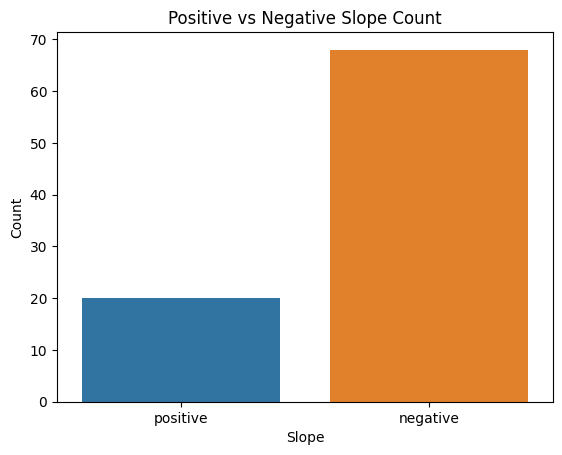

Number of positive slope examples: 20
Number of negative slope examples: 68


In [55]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 88, out of the original 572, groupings showed a statistically significant (p < .10) relationship between year and First_Yes_DOY
##20 have a positive slope
##68 have a negative slope